# **CC25-CF168 - Diagnosys - DIABETES**

## **Data Understanding**

**Deskripsi Dataset: Indikator Kesehatan Diabetes (BRFSS 2015)**

Dataset yang digunakan dalam proyek ini adalah **[Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data)**. Secara spesifik, kita akan menggunakan file `diabetes_binary_5050split_health_indicators_BRFSS2015.csv`.



---


**Sumber dan Konteks:**

Data ini berasal dari **Behavioral Risk Factor Surveillance System (BRFSS) tahun 2015**, sebuah survei kesehatan tahunan berskala besar yang dilakukan oleh CDC (Centers for Disease Control and Prevention) di Amerika Serikat. Dataset ini berisi 21 fitur yang merupakan indikator kesehatan, demografi, dan gaya hidup dari responden.

---

**Variabel Target dan Keseimbangan Kelas**

Variabel target yang akan kita prediksi adalah **`Diabetes_binary`**. Kolom ini memiliki dua nilai:
* **0**: Responden tidak menderita diabetes.
* **1**: Responden menderita pradiabetes atau sudah didiagnosis diabetes.

Keunggulan utama dari file dataset yang kita gunakan (`diabetes_binary_5050split_health_indicators_BRFSS2015.csv`) adalah **targetnya yang sudah dibuat seimbang (50/50 split)**. Ini berarti jumlah data untuk kelas `0` dan `1` dibuat sama.

---
**Deskripsi Fitur**



| Variabel                 | Deskripsi                                                                          | Nilai                                                                |
| ------------------------ | ---------------------------------------------------------------------------------- | -------------------------------------------------------------------- |
| **Diabetes\_binary**     | Fitur Target                               | 0 = Tidak, 1 = Ya                                                    |
| **HighBP**               | Tekanan darah tinggi                                                               | 0 = Tidak, 1 = Ya                                                    |
| **HighChol**             | Kolesterol tinggi                                                                  | 0 = Tidak, 1 = Ya                                                    |
| **CholCheck**            | Pernah melakukan cek kolesterol dalam 5 tahun terakhir                             | 0 = Tidak, 1 = Ya                                                    |
| **BMI**                  | Indeks massa tubuh (Body Mass Index)                                               | Nilai numerik (kontinu)                                              |
| **Smoker**               | Merokok setidaknya 100 batang rokok selama hidup                                   | 0 = Tidak, 1 = Ya                                                    |
| **Stroke**               | Pernah mengalami stroke                                                            | 0 = Tidak, 1 = Ya                                                    |
| **HeartDiseaseorAttack** | Riwayat penyakit jantung koroner atau serangan jantung                             | 0 = Tidak, 1 = Ya                                                    |
| **PhysActivity**         | Aktivitas fisik di luar pekerjaan                                                  | 0 = Tidak, 1 = Ya                                                    |
| **Fruits**               | Mengonsumsi buah minimal 1 kali sehari                                             | 0 = Tidak, 1 = Ya                                                    |
| **Veggies**              | Mengonsumsi sayur minimal 1 kali sehari                                            | 0 = Tidak, 1 = Ya                                                    |
| **HvyAlcoholConsump**    | Konsumsi alkohol berat (lebih dari 14 gelas per minggu untuk pria, 7 untuk wanita) | 0 = Tidak, 1 = Ya                                                    |
| **AnyHealthcare**        | Memiliki akses ke asuransi atau layanan kesehatan                                  | 0 = Tidak, 1 = Ya                                                    |
| **NoDocbcCost**          | Tidak dapat ke dokter karena biaya                                                 | 0 = Tidak, 1 = Ya                                                    |
| **GenHlth**              | Persepsi umum terhadap kesehatan                                                   | 1 = Sangat baik, 2 = Baik, 3 = Cukup, 4 = Buruk, 5 = Sangat buruk    |
| **MentHlth**             | Hari tidak sehat secara mental dalam 30 hari terakhir                              | Nilai numerik (0–30)                                                 |
| **PhysHlth**             | Hari tidak sehat secara fisik dalam 30 hari terakhir                               | Nilai numerik (0–30)                                                 |
| **DiffWalk**             | Kesulitan berjalan atau naik tangga                                                | 0 = Tidak, 1 = Ya                                                    |
| **Sex**                  | Jenis kelamin                                                                      | 0 = Perempuan, 1 = Laki-laki                                         |
| **Age**                  | Kategori umur dalam kelompok 5 tahun                                               | 1 = 18–24, 2 = 25–29, ..., 13 = ≥80                                  |
| **Education**            | Tingkat pendidikan terakhir                                                        | 1 = Tidak tamat SMA, 2 = Tamat SMA, 3 = Beberapa kuliah, 4 = Sarjana |
| **Income**               | Kelompok pendapatan rumah tangga per tahun                                         | 1 = <10K, 2 = 10–15K, ..., 8 = ≥75K                                  |




## Import Library

In [ ]:
# Manipulasi Data dan Operasi Numerik
import pandas as pd
import numpy as np

# Visualisasi Data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Operasi File dan Sistem
import os
from google.colab import files
import shutil

# Persiapan Data dan Selekesi Fitur
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve

# Penanganan Data Tidak Seimbang
from imblearn.pipeline import Pipeline

# Model Machine Learning Kasik
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Deep Learning (TensorFlow & Keras)
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Dense,
    BatchNormalization,
    Normalization,
    Input,
    concatenate,
    Lambda,
    Dropout,
    Layer
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Evaluasi Model
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error,
    roc_auc_score,
    precision_recall_curve,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
)

**INSIGHT**

---

**1. Manipulasi Data dan Operasi Numerik**
* **pandas (`pd`)**: Library utama untuk bekerja dengan data tabular (seperti tabel atau spreadsheet). Digunakan untuk membaca file (misalnya CSV), membersihkan data, mengubah, dan menganalisis struktur data dalam format yang disebut **DataFrame**.
* **numpy (`np`)**: Fondasi untuk komputasi numerik di Python. Digunakan untuk bekerja dengan array (vektor, matriks) secara efisien, yang merupakan dasar dari banyak operasi machine learning.

**2. Visualisasi Data**
* **matplotlib.pyplot (`plt`)**: Library dasar untuk membuat berbagai jenis plot dan grafik statis, seperti grafik garis, bar, dan histogram.
* **seaborn (`sns`)**: Dibangun di atas matplotlib, library ini memudahkan pembuatan visualisasi statistik yang lebih menarik dan informatif (contoh: heatmap, boxplot, violinplot).

**3. Operasi File dan Sistem**
* **os & shutil**: Digunakan untuk berinteraksi dengan sistem operasi, seperti mengelola direktori, memindahkan file (`shutil`), dan menangani path file.
* **google.colab files**: Modul khusus untuk Google Colab yang memungkinkan Anda mengunggah dan mengunduh file dari lingkungan Colab.

**4. Preprocessing dan Seleksi Fitur**
* **sklearn.preprocessing (`StandardScaler`, `MinMaxScaler`)**: Berisi alat untuk mengubah skala fitur. **`StandardScaler`** mengubah fitur agar memiliki rata-rata 0 dan standar deviasi 1, sementara **`MinMaxScaler`** mengubah fitur ke rentang tertentu (biasanya 0 hingga 1).
* **sklearn.feature_selection (`RFE`, `SelectKBest`, `f_classif`)**: Menyediakan metode untuk memilih fitur yang paling relevan atau penting dari dataset Anda untuk meningkatkan performa model dan mengurangi kompleksitas.

**5. Pembagian Data dan Pemodelan**
* **sklearn.model_selection (`train_test_split`, `learning_curve`)**: Digunakan untuk membagi dataset menjadi data latih dan data uji, serta untuk menganalisis kurva belajar model.
* **sklearn.linear_model (`LogisticRegression`)**: Implementasi model Regresi Logistik, model linear klasik yang sering digunakan sebagai baseline untuk masalah klasifikasi.
* **sklearn.ensemble (`RandomForestClassifier`)**: Implementasi model Random Forest, sebuah model *ensemble* yang kuat dan seringkali berkinerja tinggi untuk klasifikasi dengan menggabungkan banyak *decision tree*.

**6. Evaluasi Model**
* **sklearn.metrics**: Kumpulan lengkap fungsi untuk mengukur performa model.
    * **Untuk Klasifikasi**: `classification_report`, `confusion_matrix`, `accuracy_score`, `precision_score`, `recall_score`, `f1_score`, `roc_auc_score`.
    * **Visualisasi Kinerja**: `ConfusionMatrixDisplay`, `roc_curve`, `precision_recall_curve`.
    * **Untuk Regresi**: `mean_squared_error`.

**7. Pipeline dan Penanganan Data Tidak Seimbang**
* **imblearn.pipeline (`Pipeline`)**: Versi *pipeline* dari library `imbalanced-learn` yang memungkinkan Anda untuk menggabungkan langkah-langkah *resampling* (untuk data tidak seimbang) dengan langkah-langkah pemrosesan lainnya secara berurutan dan terstruktur.

**8. Deep Learning dengan TensorFlow/Keras**
* **tensorflow (`tf`)**: Platform *end-to-end* untuk membangun dan melatih model machine learning, terutama jaringan saraf tiruan (*deep learning*).
* **tensorflow.keras**: API tingkat tinggi di dalam TensorFlow yang membuat pembangunan model menjadi lebih mudah dan intuitif.
    * **Layers**: Blok bangunan dasar dari jaringan saraf (contoh: `Dense` untuk layer yang terhubung penuh, `BatchNormalization`, `Dropout` untuk regularisasi, `Input` untuk mendefinisikan input).
    * **Model**: Kerangka untuk menggabungkan *layers* menjadi sebuah model yang dapat dilatih.
    * **Optimizers (`Adam`)**: Algoritma yang digunakan untuk memperbarui bobot model selama proses training untuk meminimalkan *loss*.
    * **Callbacks (`EarlyStopping`)**: Fungsi yang dapat dipanggil selama training untuk melakukan tindakan tertentu, seperti menghentikan training lebih awal jika tidak ada peningkatan performa.


## Load Dataset

In [ ]:
# Upload kaggle.json
files.upload()

In [ ]:
# Setup Kaggle API key
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d alexteboul/diabetes-health-indicators-dataset

# Unzip file
!unzip -q diabetes-health-indicators-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset
License(s): CC0-1.0
  0% 0.00/6.03M [00:00<?, ?B/s]
100% 6.03M/6.03M [00:00<00:00, 1.02GB/s]


In [ ]:
# Baca file CSV
df = pd.read_csv("/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

# Testing
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


**INSIGHT**


---



Kode ini melakukan otentikasi sesi Colab menggunakan kunci API Kaggle. Setelah itu, dataset diunduh, diekstrak, dan file CSV yang relevan langsung dimuat ke dalam DataFrame pandas bernama `df`.

## Exploratory Data Analysis (EDA)

### Identifying Invalid Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

### Identifying Missing Values

In [ ]:
df.isna().sum()

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


### Identifying Duplicate Data

In [ ]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  1635


### Identifying Inaccurate Values

In [ ]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### Identifying Outlier

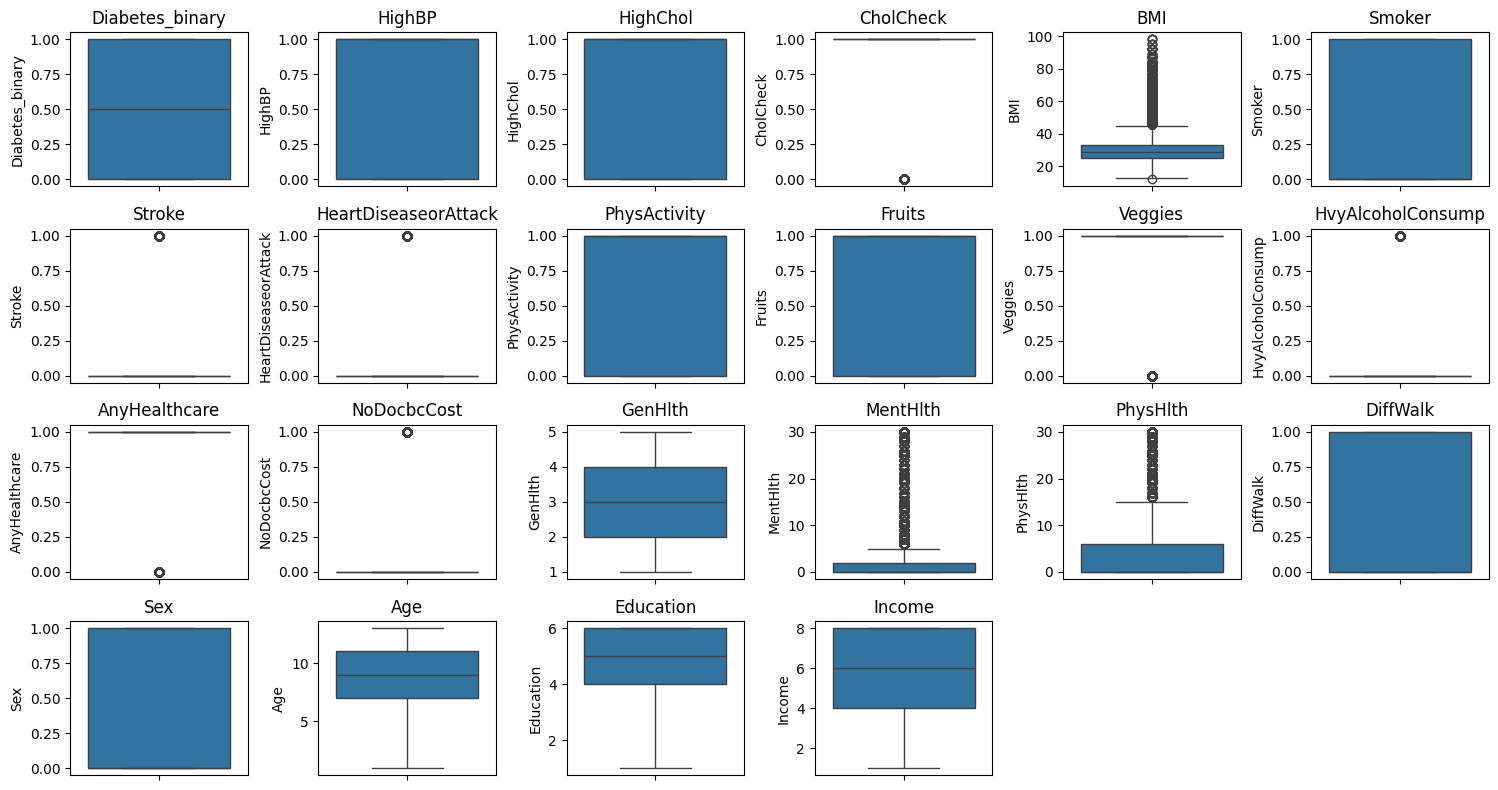

In [ ]:
plt.figure(figsize=(15, 8))
for i, feature in enumerate(df, 1):
    plt.subplot(4, 6, i)
    sns.boxplot(y=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

### Identifying Data Distribution of Feature

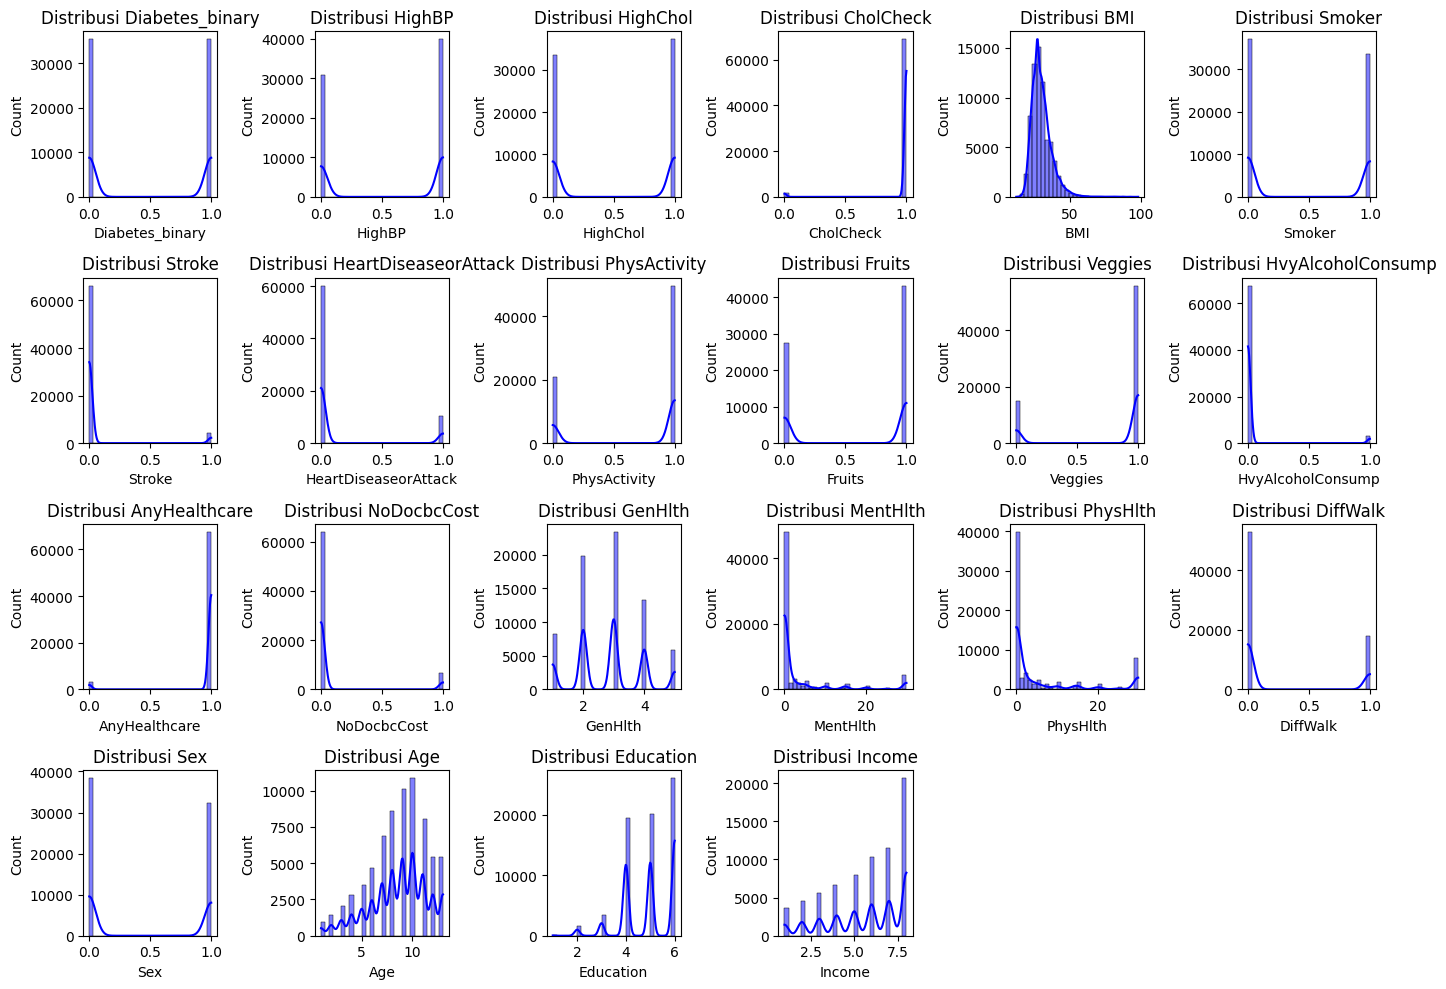

In [ ]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 6, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

### Identifying Target Data Distribution

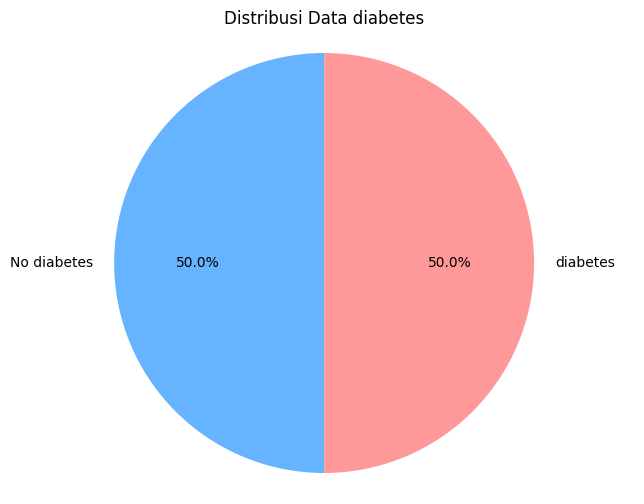

In [ ]:
diabetes_counts = df['Diabetes_binary'].value_counts()

# Buat labels
labels = ['No diabetes', 'diabetes']

# Buat pie chart
plt.figure(figsize=(8, 6))
plt.pie(diabetes_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Distribusi Data diabetes')
plt.axis('equal')
plt.show()

### Identifying Feature Correlations

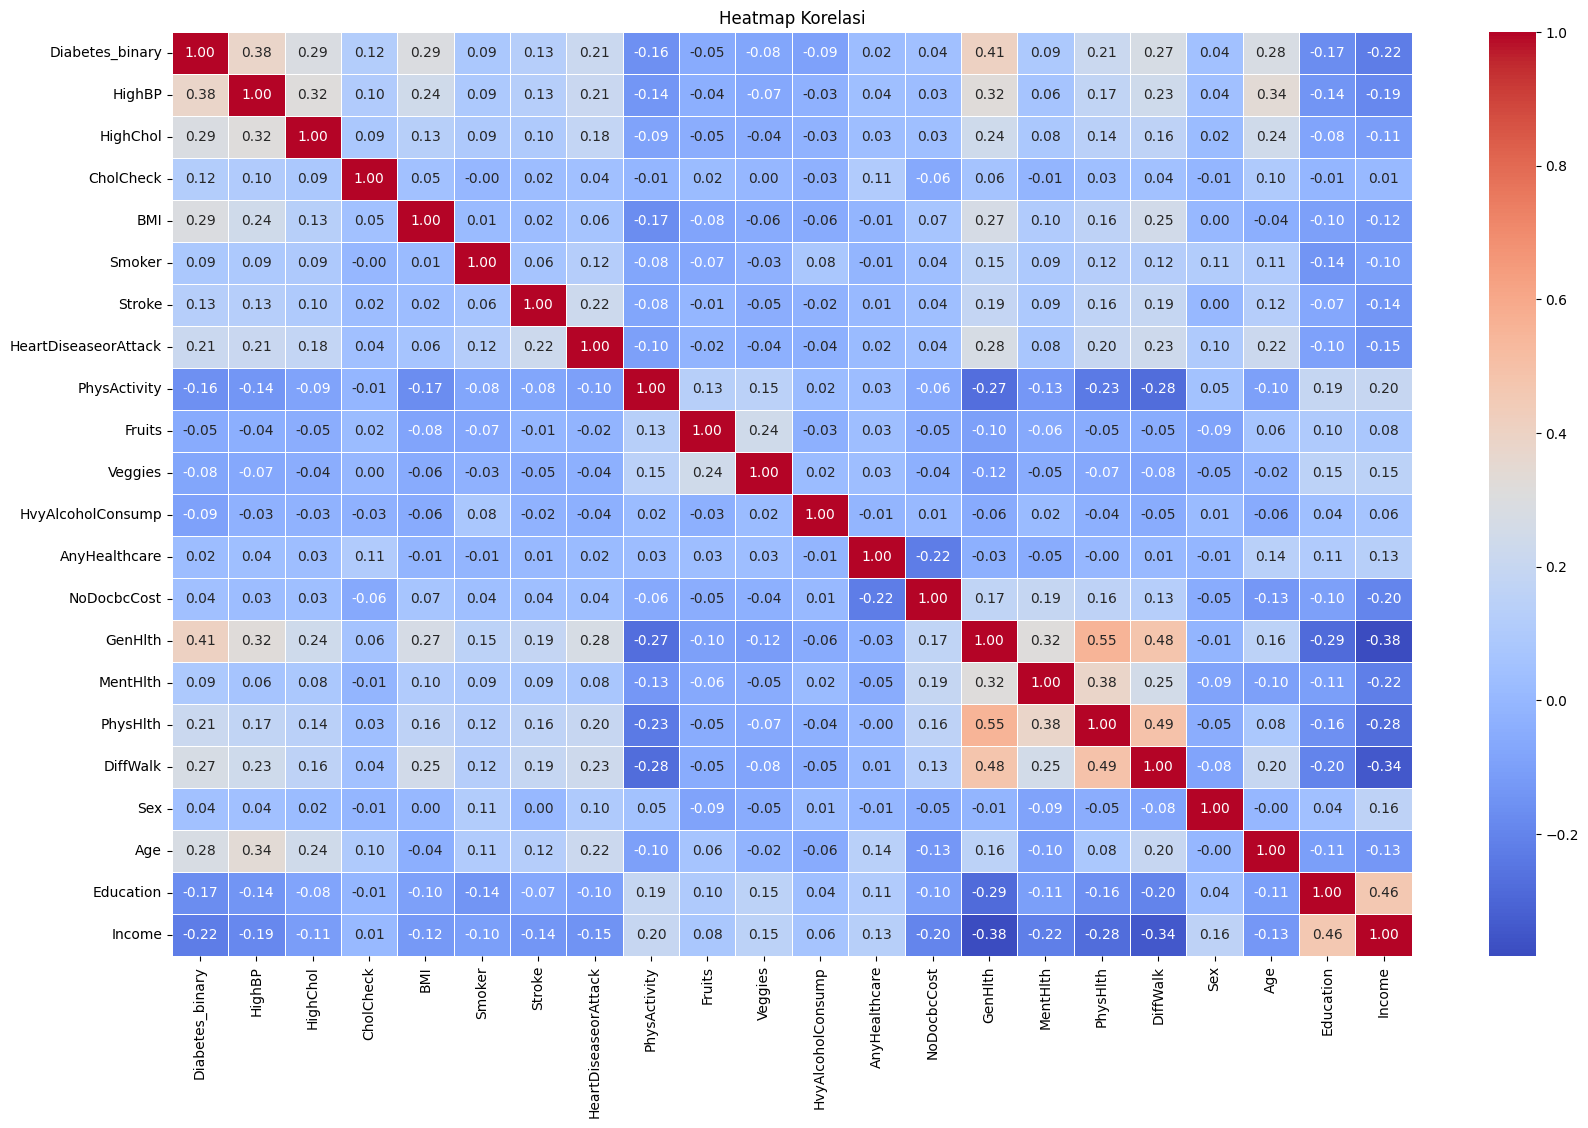

In [ ]:
plt.figure(figsize=(20, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

### Average of Target Feature (`diabetes_binary`) Against Other Features

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


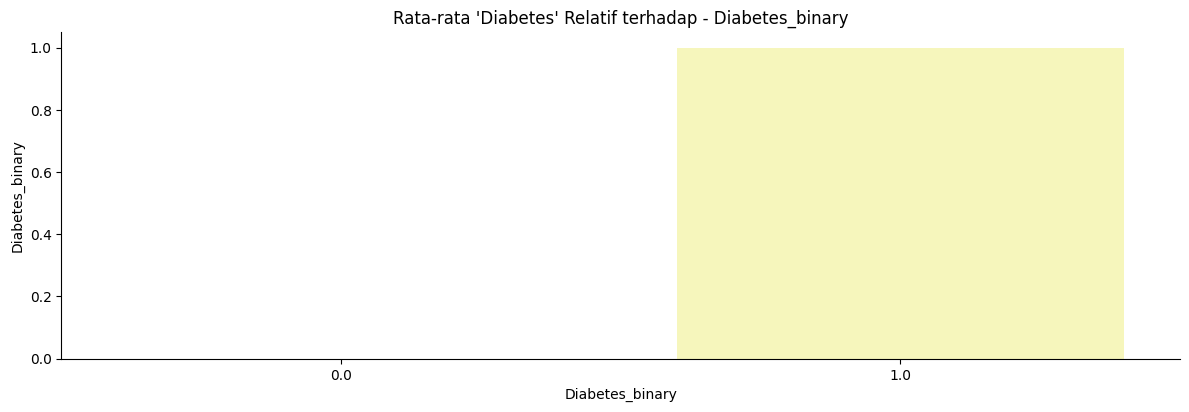

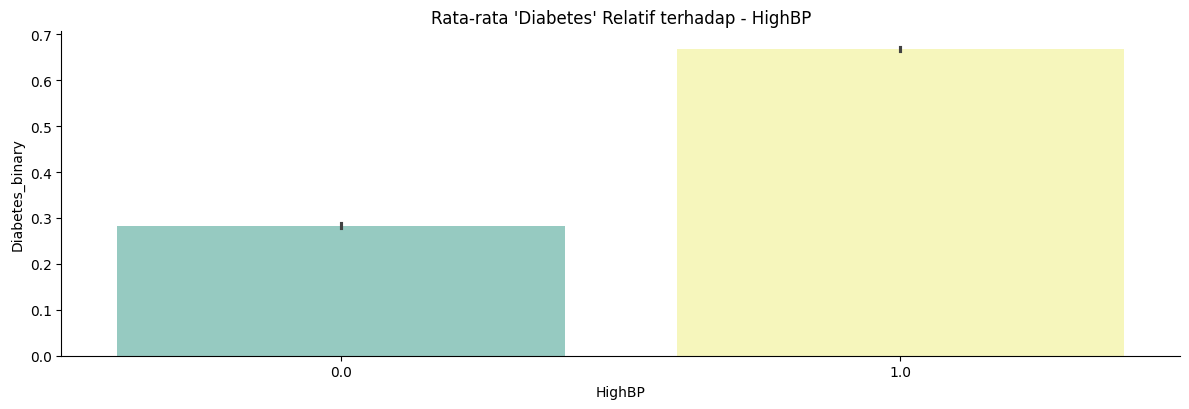

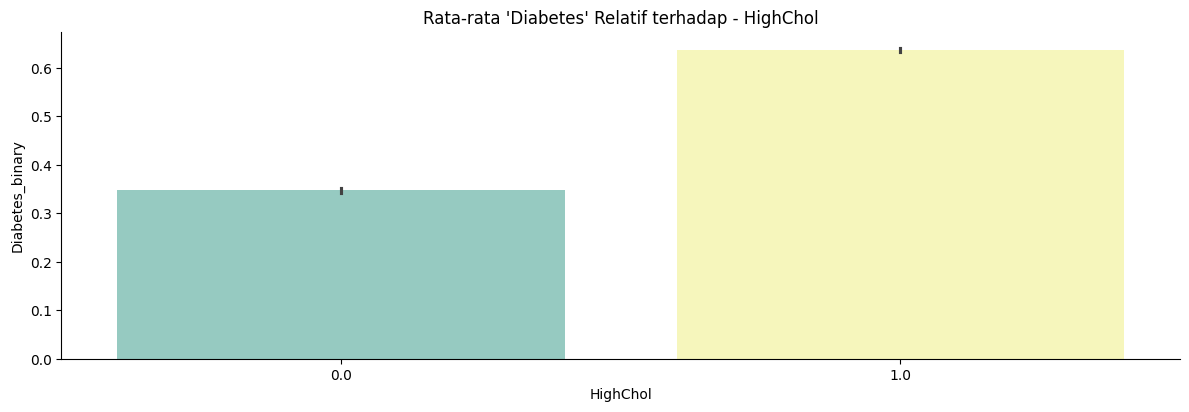

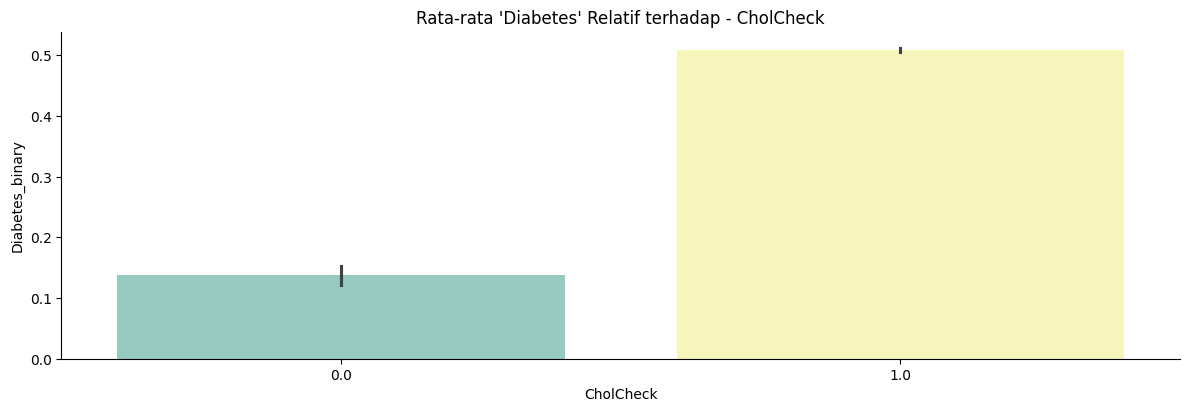

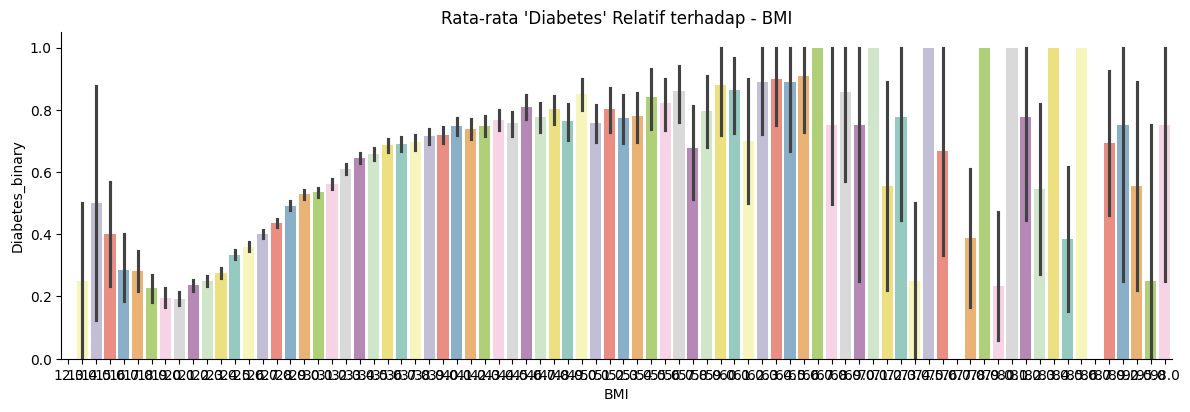

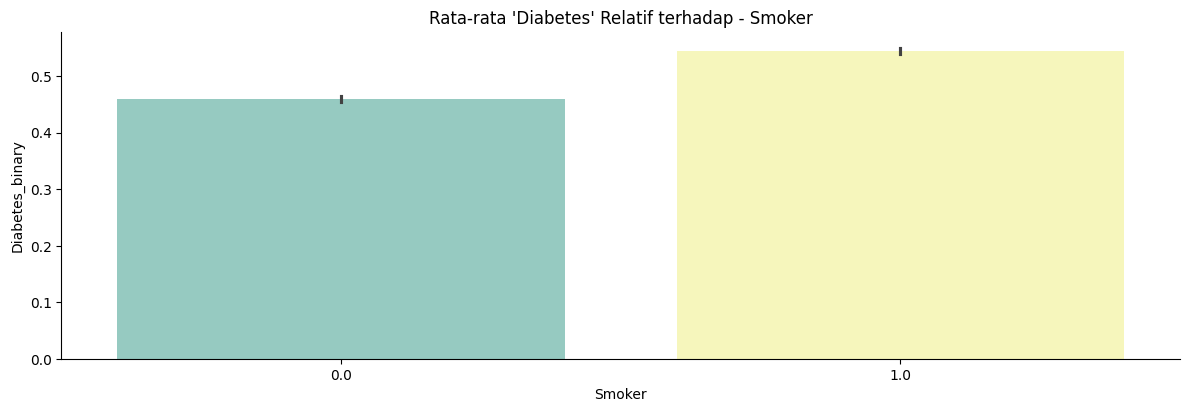

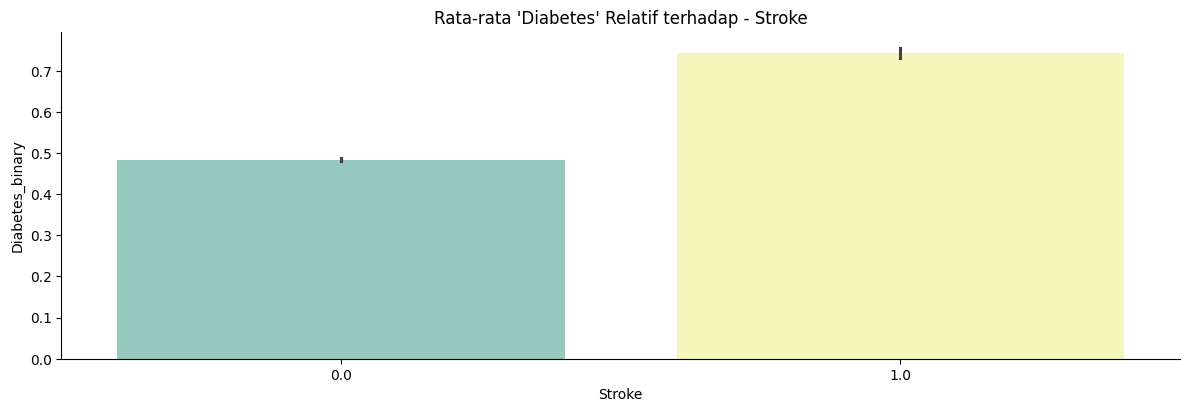

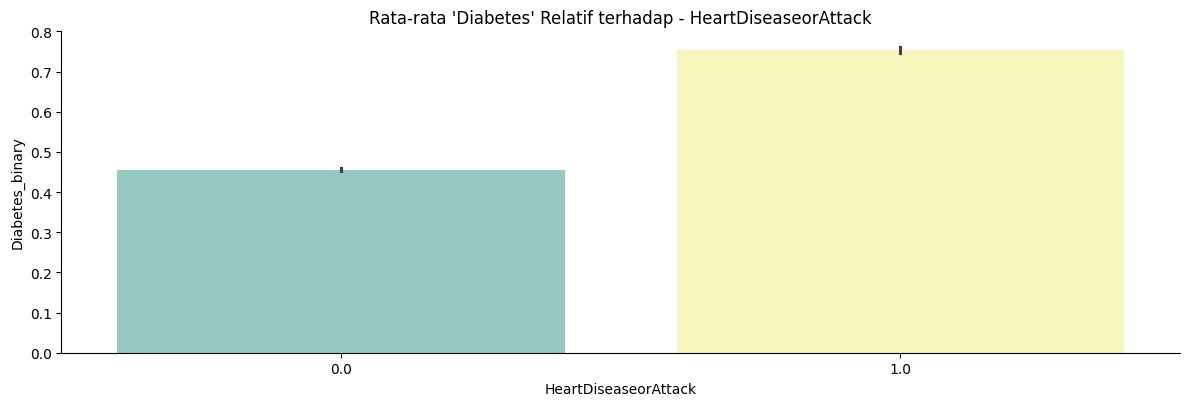

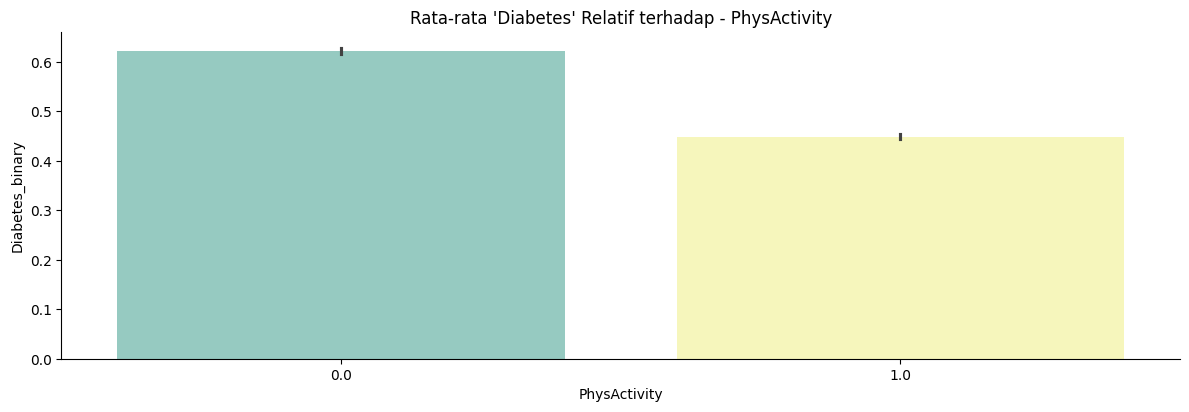

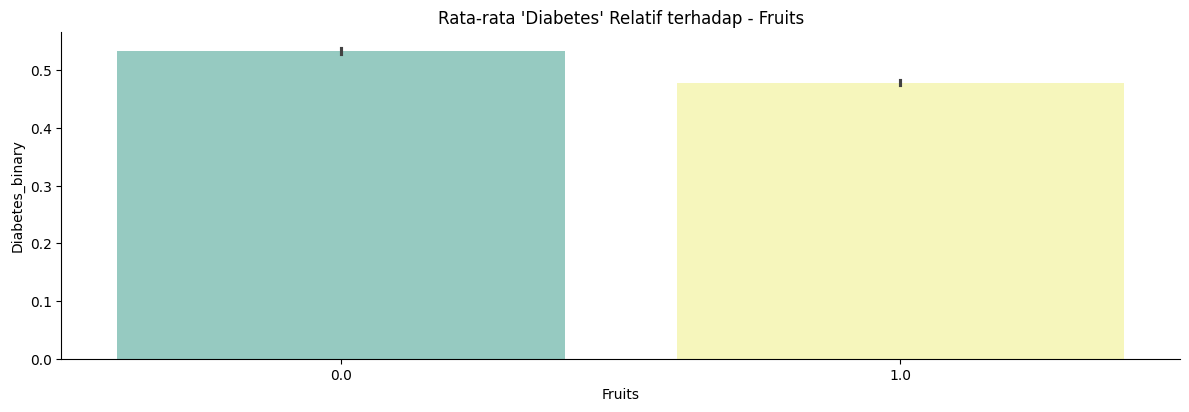

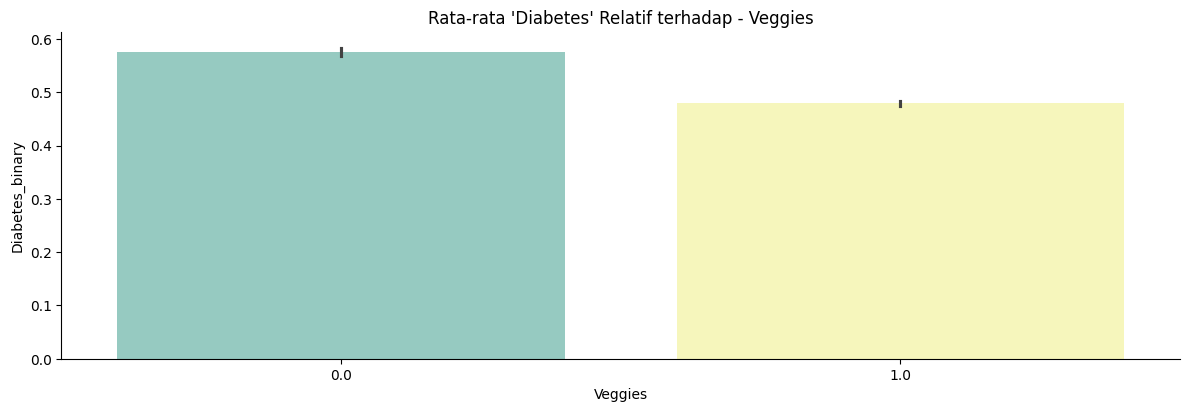

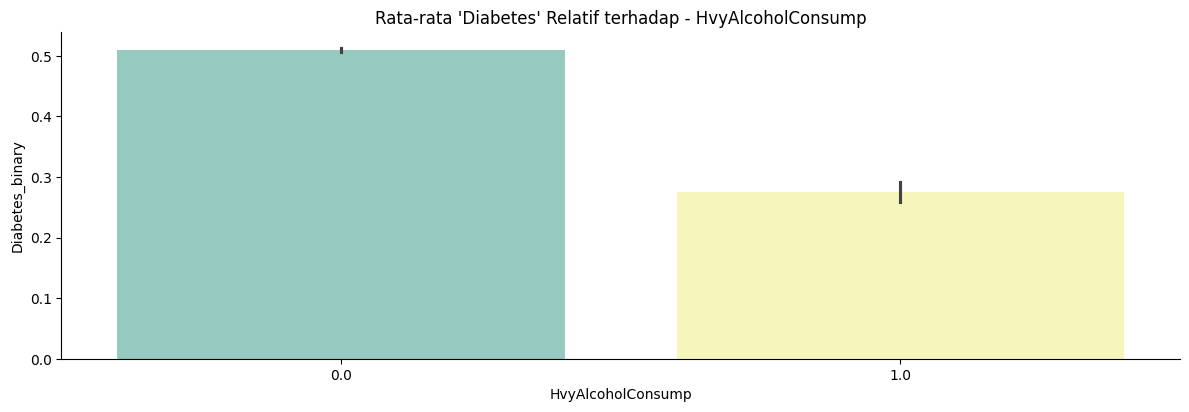

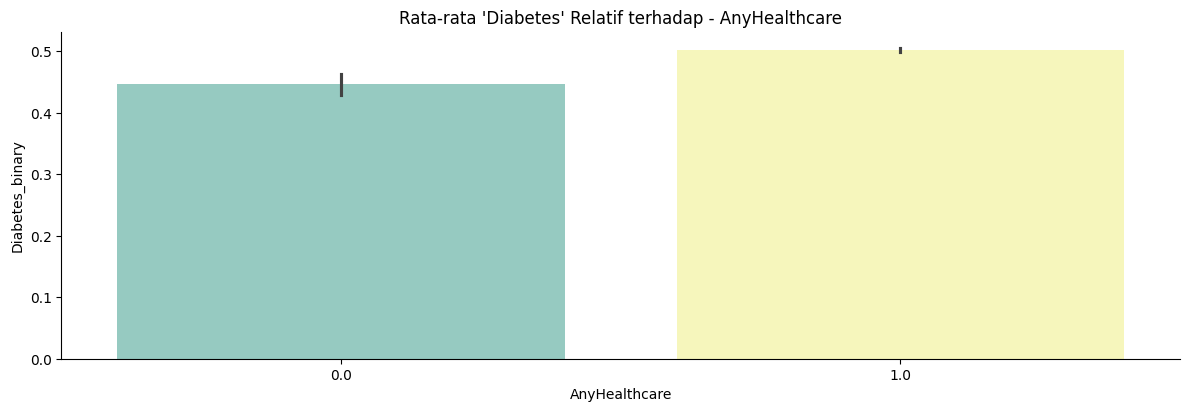

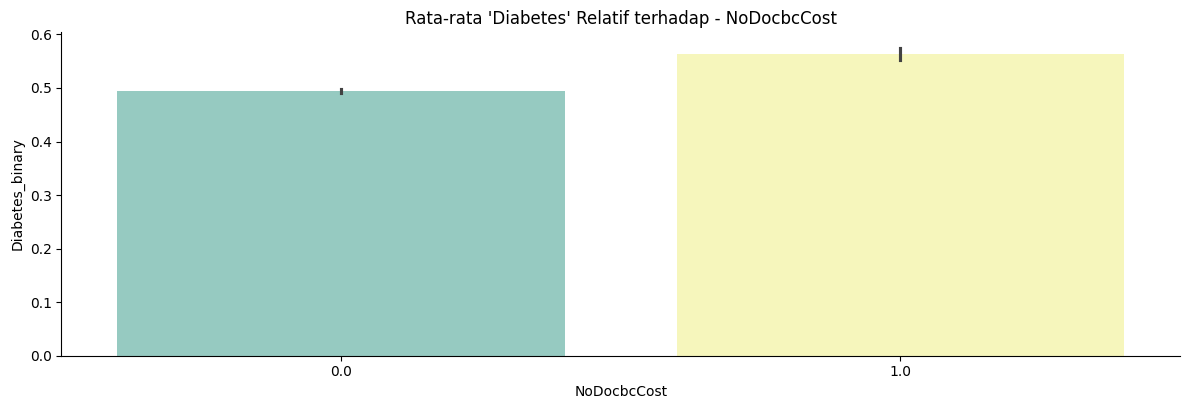

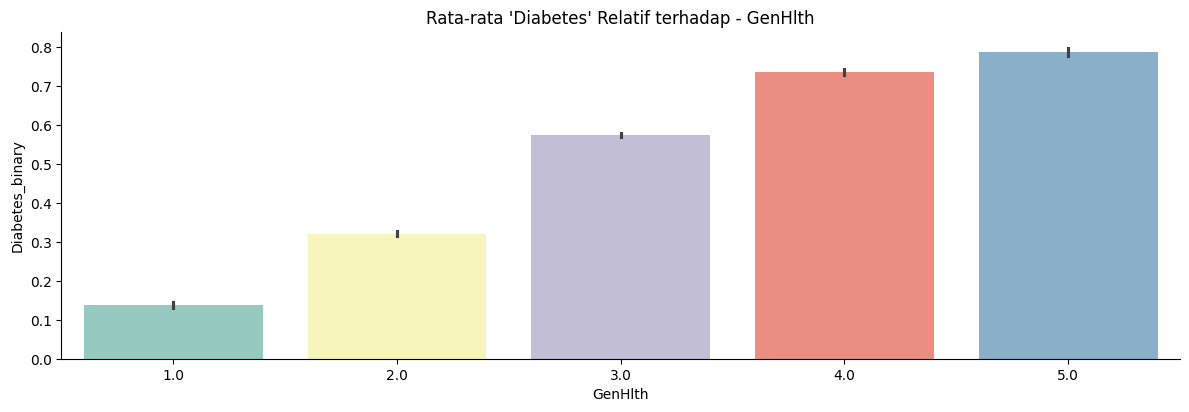

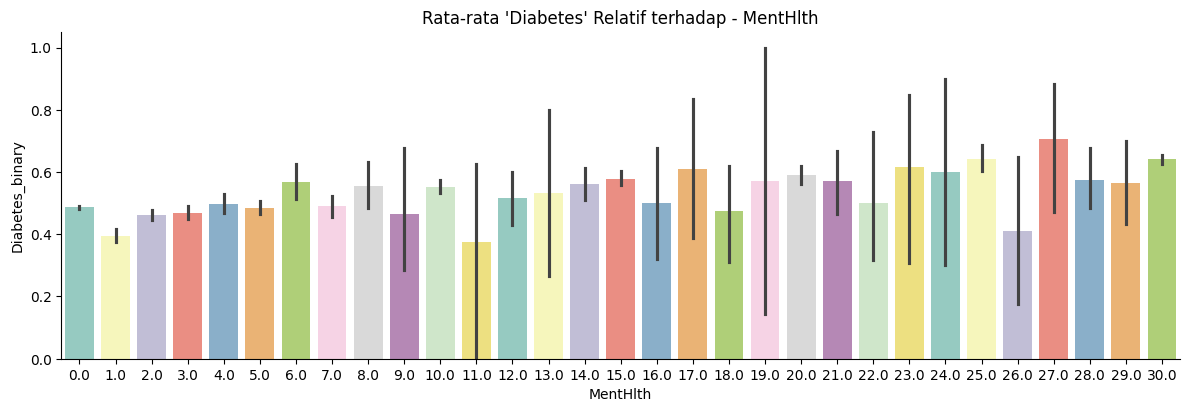

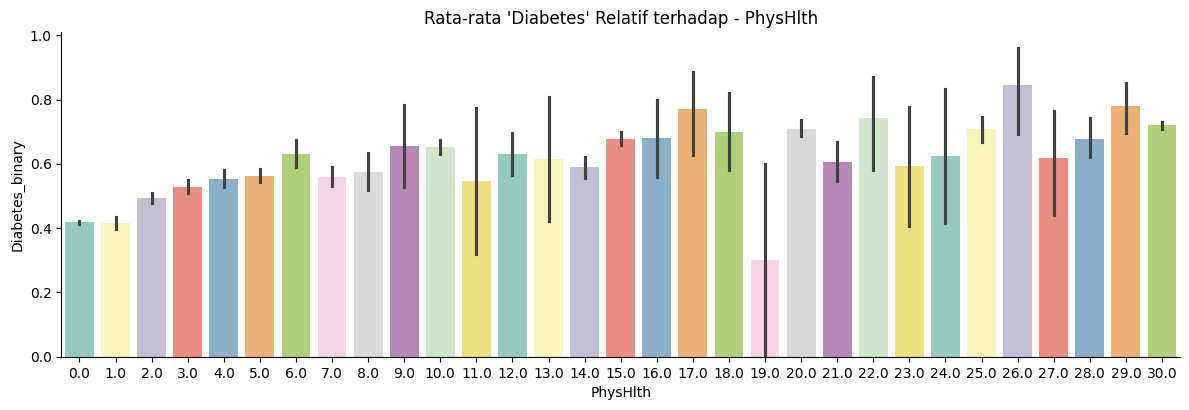

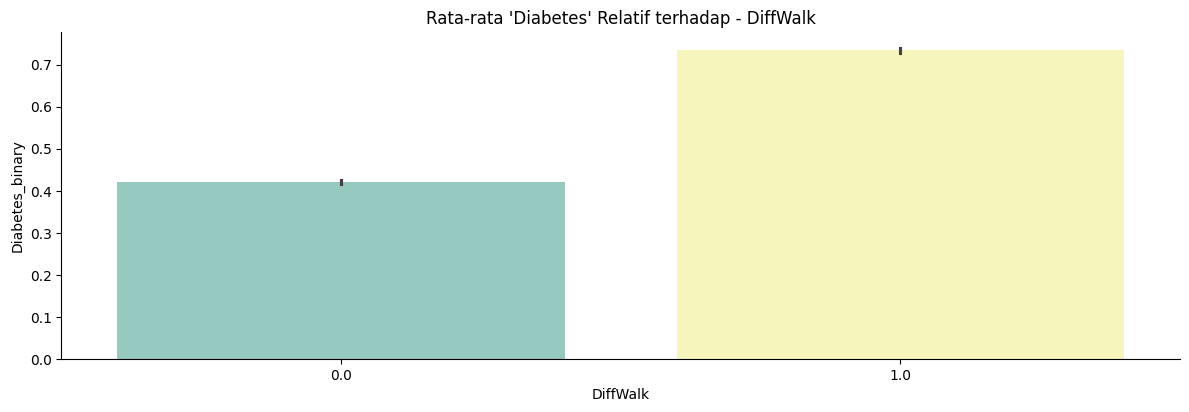

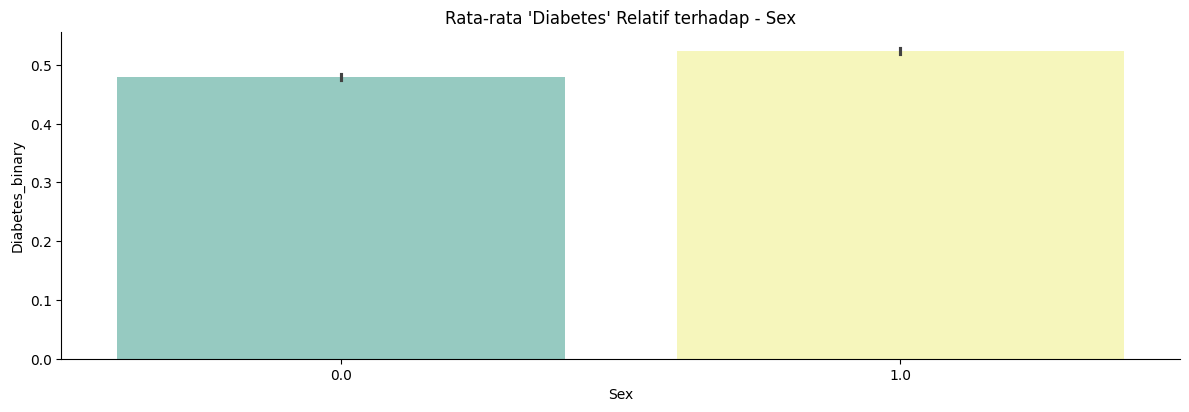

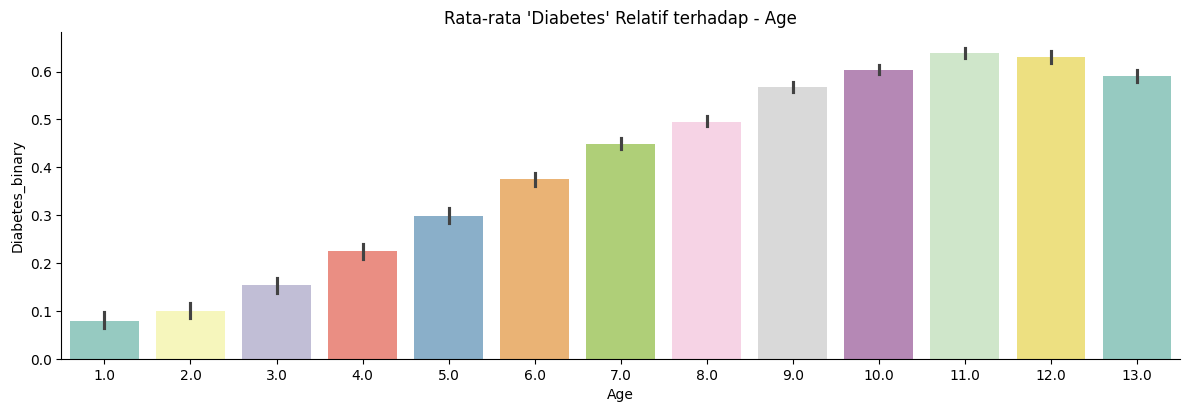

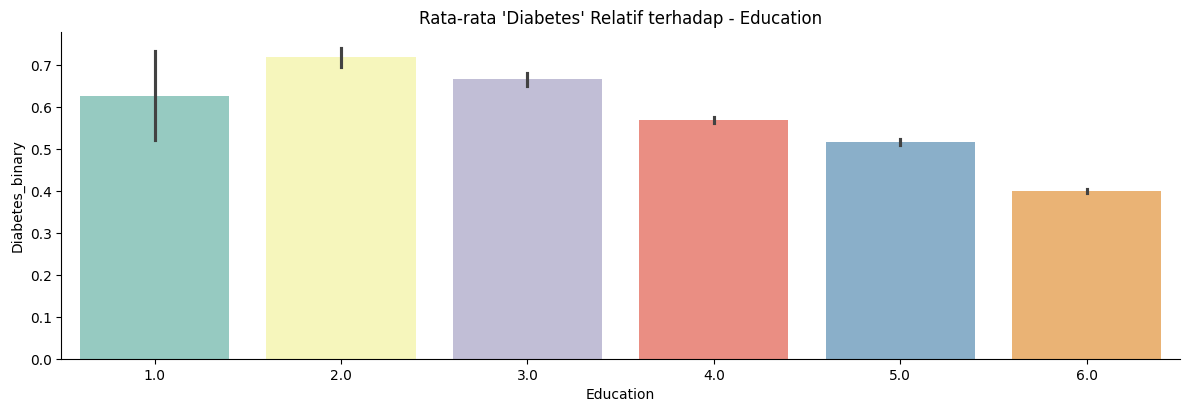

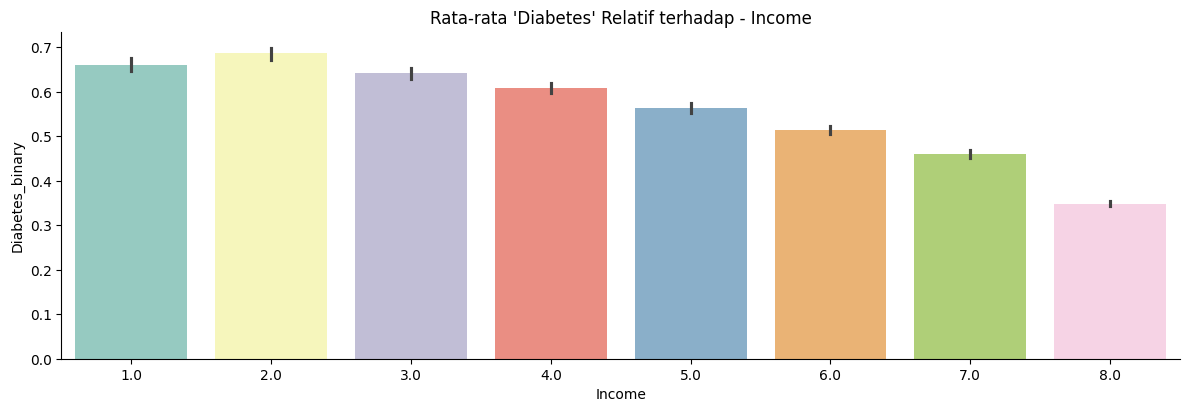

In [ ]:
for col in df:
  sns.catplot(x=col, y=df['Diabetes_binary'] == 1, kind="bar", dodge=False, height = 4, aspect = 3,  data=df, hue=col, palette="Set3", legend=False)
  plt.title("Rata-rata 'Diabetes' Relatif terhadap - {}".format(col))

**INSIGHT**


---


Analisis data secara komprehensif pada dataset `diabetes_binary_5050split` telah berhasil mengidentifikasi pola dan faktor-faktor kunci yang berhubungan dengan status diabetes.

**1. Gambaran Umum Dataset**
Dataset ini merupakan fondasi yang sangat baik untuk pemodelan, dengan karakteristik utama:
* **Target Seimbang Sempurna (50/50)**, yang menyederhanakan proses evaluasi model.
* **Data Bersih**, tanpa ada nilai yang hilang (*missing values*), mengurangi kompleksitas tahap *preprocessing*.
* **Ukuran Data yang Besar** (lebih dari 70.000 entri), yang mendukung pembangunan model yang robust.

**2. Faktor Risiko Utama (Prediktor Paling Kuat)**
Sekelompok fitur menunjukkan hubungan yang sangat kuat dan jelas dengan kemungkinan menderita diabetes. Ini adalah prediktor paling dominan dalam dataset:
* **Kondisi Kesehatan Umum (`GenHlth`)**: Semakin buruk persepsi kesehatan umum, semakin tinggi secara drastis risiko diabetes.
* **Kondisi Medis Kronis**: Riwayat **`HighBP`** (Darah Tinggi), **`HighChol`** (Kolesterol Tinggi), **`HeartDiseaseorAttack`** (Serangan Jantung), dan **`Stroke`** secara signifikan meningkatkan kemungkinan diabetes.
* **Karakteristik Fisik**: Peningkatan **`BMI`** dan adanya **`DiffWalk`** (Kesulitan Berjalan) berhubungan erat dengan tingkat diabetes yang lebih tinggi.
* **Demografi (`Age`)**: Usia adalah faktor risiko yang sangat kuat; semakin tua seseorang, semakin tinggi kemungkinannya menderita diabetes.

**3. Faktor Risiko Menengah (Hubungan Jelas dan Konsisten)**
Fitur-fitur ini juga menunjukkan korelasi yang jelas, meskipun tidak sedramatis kelompok utama:
* **Sosio-ekonomi (`Income`, `Education`)**: Tingkat pendapatan dan pendidikan yang lebih tinggi secara konsisten berhubungan dengan risiko diabetes yang lebih rendah.
* **Aktivitas Fisik (`PhysActivity`)**: Responden yang tidak aktif secara fisik memiliki kemungkinan diabetes yang jauh lebih tinggi.
* **Jenis Kelamin (`Sex`)**: Terdapat perbedaan, di mana pria (`Sex=1.0`) memiliki tingkat diabetes yang sedikit lebih tinggi.

**4. Faktor dengan Pengaruh Lebih Rendah atau Berlawanan**
* **Diet (`Fruits`, `Veggies`)**: Konsumsi buah dan sayur menunjukkan hubungan negatif dengan diabetes, namun pengaruhnya sangat kecil.
* **Gaya Hidup Lain (`Smoker`)**: Perokok memiliki risiko yang sedikit lebih tinggi, tetapi perbedaannya tidak signifikan.
* **Temuan Menarik (`HvyAlcoholConsump`)**: Secara mengejutkan, peminum alkohol berat menunjukkan tingkat diabetes yang jauh lebih rendah. Ini adalah temuan statistik yang mungkin dipengaruhi oleh faktor-faktor lain dan tidak menyiratkan hubungan sebab-akibat.
* **Kesehatan Mental (`MentHlth`)**: Hubungannya dengan diabetes cenderung positif namun sangat lemah dan "berisik" (*noisy*).

## Data Preprocessing

### Features selection

##### First Data Splitting for Features Selection

In [ ]:
# Data splitting diawal untuk proses pemilihan fitur penting
X = df.drop(["Diabetes_binary"],axis =1)
y = df["Diabetes_binary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

# Testing
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 70692
Total # of sample in train dataset: 56553
Total # of sample in test dataset: 14139


#### Recursive Feature Elimination (RFE) with Logistic Regression

In [ ]:
# Inisialisasi model (Logistic Regression adalah pilihan umum untuk RFE dengan klasifikasi)
model_rfe = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)

# Inisialisasi RFE untuk memilih sejumlah fitur (misalnya, 10)
rfe = RFE(estimator=model_rfe, n_features_to_select=10)

# Fit RFE pada data pelatihan
rfe.fit(X_train, y_train)

# Dapatkan fitur-fitur yang terpilih
selected_features_rfe = X_train.columns[rfe.support_]
print("Fitur terpilih dengan RFE:")
print(selected_features_rfe)

# Dapatkan peringkat fitur (fitur dengan peringkat 1 adalah yang terpilih)
feature_ranking_rfe = pd.DataFrame({'Fitur': X_train.columns, 'Peringkat RFE': rfe.ranking_})
print("\nPeringkat Fitur RFE:")
print(feature_ranking_rfe.sort_values(by='Peringkat RFE'))

Fitur terpilih dengan RFE:
Index(['HighBP', 'HighChol', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack',
       'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'Sex', 'Age'],
      dtype='object')

Peringkat Fitur RFE:
                   Fitur  Peringkat RFE
0                 HighBP              1
1               HighChol              1
2              CholCheck              1
5                 Stroke              1
6   HeartDiseaseorAttack              1
13               GenHlth              1
10     HvyAlcoholConsump              1
9                Veggies              1
18                   Age              1
17                   Sex              1
3                    BMI              2
20                Income              3
7           PhysActivity              4
16              DiffWalk              5
19             Education              6
8                 Fruits              7
11         AnyHealthcare              8
4                 Smoker              9
15              PhysHlth    

#### SelectKBest with ANOVA (f_classif)

In [ ]:
# Inisialisasi SelectKBest untuk memilih sejumlah fitur (misalnya, 10)
k_best = SelectKBest(score_func=f_classif, k=10)

# Fit SelectKBest pada data pelatihan
k_best.fit(X_train, y_train)

# Dapatkan fitur-fitur yang terpilih
selected_features_kbest = X_train.columns[k_best.get_support()]
print("\nFitur terpilih dengan SelectKBest (ANOVA):")
print(selected_features_kbest)

# Dapatkan skor ANOVA dan p-value untuk setiap fitur
feature_scores_kbest = pd.DataFrame({
    'Fitur': X_train.columns,
    'Skor ANOVA': k_best.scores_,
    'p-value': k_best.pvalues_
}).sort_values(by='Skor ANOVA', ascending=False)

print("\nSkor ANOVA Fitur:")
print(feature_scores_kbest)


Fitur terpilih dengan SelectKBest (ANOVA):
Index(['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth',
       'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income'],
      dtype='object')

Skor ANOVA Fitur:
                   Fitur    Skor ANOVA        p-value
13               GenHlth  11441.080616   0.000000e+00
0                 HighBP   9562.554546   0.000000e+00
3                    BMI   5317.424674   0.000000e+00
1               HighChol   5237.038920   0.000000e+00
18                   Age   4744.489828   0.000000e+00
16              DiffWalk   4468.811167   0.000000e+00
20                Income   2947.090033   0.000000e+00
6   HeartDiseaseorAttack   2693.400453   0.000000e+00
15              PhysHlth   2692.759016   0.000000e+00
19             Education   1645.040919   0.000000e+00
7           PhysActivity   1459.118952  3.162763e-315
5                 Stroke    916.992966  7.915142e-200
2              CholCheck    747.470764  1.657774e-163
10     HvyAlcoholConsump  

#### Random Forest Feature Importance

In [ ]:
# Inisialisasi model Random Forest
model_rf = RandomForestClassifier(random_state=42)

# Fit model pada data pelatihan
model_rf.fit(X_train, y_train)

# Dapatkan feature importance
feature_importance_rf = pd.DataFrame({'Fitur': X_train.columns, 'Importance': model_rf.feature_importances_})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

# Pilih sejumlah fitur teratas berdasarkan importance (misalnya, 10)
top_n_features = 10
selected_features_rf = feature_importance_rf['Fitur'][:top_n_features].values
print(f"\n{top_n_features} Fitur terpenting dari Random Forest:")
print(selected_features_rf)

print("\nFeature Importance dari Random Forest:")
print(feature_importance_rf)


10 Fitur terpenting dari Random Forest:
['BMI' 'Age' 'GenHlth' 'Income' 'HighBP' 'PhysHlth' 'Education' 'MentHlth'
 'HighChol' 'Fruits']

Feature Importance dari Random Forest:
                   Fitur  Importance
3                    BMI    0.172267
18                   Age    0.126274
13               GenHlth    0.108048
20                Income    0.083820
0                 HighBP    0.073977
15              PhysHlth    0.068421
19             Education    0.058311
14              MentHlth    0.051047
1               HighChol    0.041162
8                 Fruits    0.028221
4                 Smoker    0.028103
17                   Sex    0.026269
16              DiffWalk    0.025355
7           PhysActivity    0.022495
9                Veggies    0.021880
6   HeartDiseaseorAttack    0.019225
12           NoDocbcCost    0.012093
5                 Stroke    0.009915
10     HvyAlcoholConsump    0.009388
11         AnyHealthcare    0.007667
2              CholCheck    0.006061


**INSIGHT**


---

Proses ini bertujuan untuk mengidentifikasi fitur-fitur yang paling prediktif dari 21 fitur yang ada, dengan menggunakan tiga pendekatan yang berbeda: RFE (berbasis model linear), SelectKBest (berbasis statistik univariat), dan Random Forest (berbasis model *ensemble* non-linear).

**1. Adanya Konsensus Kuat pada Fitur-Fitur Inti**

Terdapat **4 fitur yang secara konsisten dipilih sebagai yang terpenting oleh ketiga metode**, menandakan bahwa fitur-fitur ini adalah prediktor yang paling kuat dan fundamental untuk status diabetes:
* **`GenHlth`** (Kesehatan Umum)
* **`HighBP`** (Darah Tinggi)
* **`Age`** (Usia)
* **`HighChol`** (Kolesterol Tinggi)

**2. Fitur Penting Lainnya yang Sering Muncul**
Selain 4 fitur inti di atas, beberapa fitur lain juga sering muncul di dua dari tiga metode, menegaskan pentingnya mereka:
* **`BMI`**, **`Income`**, **`Education`**, dan **`PhysHlth`** dipilih oleh Random Forest dan SelectKBest.
* **`HeartDiseaseorAttack`** dipilih oleh RFE dan SelectKBest.

**3. Perbedaan Metode Memberikan Perspektif Berbeda**
* **SelectKBest (ANOVA)** cenderung memilih fitur dengan hubungan statistik langsung yang kuat, bahkan jika dilihat secara terpisah (contoh: `DiffWalk`).
* **Random Forest** sangat baik dalam menangkap hubungan non-linear dan interaksi, yang menjelaskan mengapa **`BMI`** menduduki peringkat #1 dan fitur seperti `MentHlth` juga masuk dalam 10 besar.
* **RFE** (dengan Regresi Logistik) menemukan kombinasi fitur yang bekerja paling baik untuk model linear, sehingga memilih beberapa fitur biner yang jelas hubungannya seperti `Stroke` dan `CholCheck`.

**Kesimpulan untuk Pemodelan**
Berdasarkan konsistensi dari ketiga metode, **kumpulan fitur yang terdiri dari 9-10 fitur yang paling sering muncul** (yaitu, gabungan dari poin 1 dan 2) adalah kandidat terbaik untuk membangun model yang lebih sederhana (*parsimonious*), lebih cepat, dan berpotensi memiliki generalisasi yang lebih baik tanpa mengorbankan terlalu banyak kekuatan prediktif.


### Drop Features

In [ ]:
# Menghapus kolom yang tidak diperlukan
kolom_hapus = ['AnyHealthcare', 'NoDocbcCost', 'Education', 'Income']
df_clean = df.drop(columns=kolom_hapus)

# Testing
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  GenHlth               70692 non-null  float64
 13  MentHlth              70692 non-null  float64
 14  PhysHlth              70692 non-null  float64
 15  DiffWalk           

**INSIGHT**


---

Langkah ini menyederhanakan dataset menjadi 18 fitur dengan menghapus kolom berdasarkan analisis sebelumnya:

* **`AnyHealthcare` & `NoDocbcCost`**: Dihapus karena konsisten menunjukkan daya prediksi paling rendah.
* **`Education` & `Income`**: Dihapus sebagai keputusan strategis untuk memfokuskan model pada faktor risiko kesehatan dan fisik saja, bukan faktor sosio-ekonomi.

Tujuannya adalah menciptakan dataset yang lebih ringkas dan terfokus untuk tahap pemodelan.


###Handling Duplicate Data

In [ ]:
print("Jumlah duplikasi setelah dilakukan drop features : ", df_clean.duplicated().sum())

Jumlah duplikasi setelah dilakukan drop features :  6672


In [ ]:
# Menghapus duplikasi data
df_drop_duplicate = df_clean.copy()
df_drop_duplicate.drop_duplicates(inplace=True)

# Testing
print("Jumlah duplikasi setelah dihapus: ", df_drop_duplicate.duplicated().sum())
df_drop_duplicate.info()

Jumlah duplikasi setelah dihapus:  0
<class 'pandas.core.frame.DataFrame'>
Index: 64020 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       64020 non-null  float64
 1   HighBP                64020 non-null  float64
 2   HighChol              64020 non-null  float64
 3   CholCheck             64020 non-null  float64
 4   BMI                   64020 non-null  float64
 5   Smoker                64020 non-null  float64
 6   Stroke                64020 non-null  float64
 7   HeartDiseaseorAttack  64020 non-null  float64
 8   PhysActivity          64020 non-null  float64
 9   Fruits                64020 non-null  float64
 10  Veggies               64020 non-null  float64
 11  HvyAlcoholConsump     64020 non-null  float64
 12  GenHlth               64020 non-null  float64
 13  MentHlth              64020 non-null  float64
 14  PhysHlth              64020 non-null  

**INSIGHT**


---

Setelah beberapa fitur dihapus pada tahap sebelumnya, jumlah baris data yang identik (duplikat) meningkat menjadi **6.672**. Ini terjadi karena baris yang sebelumnya unik (misalnya, hanya berbeda di kolom `Income`) kini menjadi sama.

Langkah ini kemudian **menghapus semua baris duplikat tersebut**. Tujuannya adalah untuk:
1.  **Mencegah Bias**: Menghindari model menjadi terlalu "hafal" atau bias terhadap pola data yang sering muncul akibat duplikasi.
2.  **Meningkatkan Generalisasi**: Melatih model pada data yang lebih beragam dan unik, yang diharapkan dapat meningkatkan kemampuannya untuk bekerja dengan baik pada data baru.

Hasilnya adalah dataset bersih berisi **64.020 entri unik** yang siap untuk tahap pemodelan selanjutnya.


### Changing Data Type

In [ ]:
# Mendapatkan daftar kolom yang ingin diubah tipe datanya (semua kecuali 'BMI')
cols_to_convert = df_drop_duplicate.columns.drop('BMI')

# Mengubah tipe data kolom-kolom yang dipilih menjadi integer
for col in cols_to_convert:
  df_drop_duplicate[col] = df_drop_duplicate[col].astype('int8')

# Testing
df_drop_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64020 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       64020 non-null  int8   
 1   HighBP                64020 non-null  int8   
 2   HighChol              64020 non-null  int8   
 3   CholCheck             64020 non-null  int8   
 4   BMI                   64020 non-null  float64
 5   Smoker                64020 non-null  int8   
 6   Stroke                64020 non-null  int8   
 7   HeartDiseaseorAttack  64020 non-null  int8   
 8   PhysActivity          64020 non-null  int8   
 9   Fruits                64020 non-null  int8   
 10  Veggies               64020 non-null  int8   
 11  HvyAlcoholConsump     64020 non-null  int8   
 12  GenHlth               64020 non-null  int8   
 13  MentHlth              64020 non-null  int8   
 14  PhysHlth              64020 non-null  int8   
 15  DiffWalk              64

**INSIGHT**


---

Langkah ini bertujuan untuk mengoptimalkan penggunaan memori dan membuat representasi data lebih akurat.

1.  **Aksi**: Tipe data untuk 17 kolom (semua kecuali `BMI`) diubah dari `float64` menjadi `int8`.
2.  **Alasan**: Kolom-kolom tersebut berisi bilangan bulat dengan rentang nilai yang kecil (misalnya, biner 0/1, `Age` 1-13, `GenHlth` 1-5). Tipe data `int8` (yang menyimpan angka dari -128 hingga 127) sudah lebih dari cukup dan jauh lebih hemat memori dibandingkan `float64`. `BMI` tetap sebagai `float` untuk menjaga presisi desimalnya.
3.  **Hasil**: Terjadi **penghematan memori yang sangat signifikan**. Ukuran DataFrame berkurang drastis dari **9.3 MB menjadi hanya 2.0 MB**.




### Handling Data Outlier

In [ ]:
# Mengatasi outlier kolom BMI dengan clipping
df_bmi_clapped = df_drop_duplicate.copy()
df_bmi_clapped['BMI_clapped'] = df_drop_duplicate['BMI'].clip(lower=15, upper=50)
df_bmi_clapped = df_bmi_clapped.drop(columns=['BMI'])

# Testing
print(df_bmi_clapped.head())
print(df_bmi_clapped.info())

   Diabetes_binary  HighBP  HighChol  CholCheck  Smoker  Stroke  \
0                0       1         0          1       0       0   
1                0       1         1          1       1       1   
2                0       0         0          1       0       0   
3                0       1         1          1       1       0   
4                0       0         0          1       1       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                     0             1       0        1                  0   
1                     0             0       1        0                  0   
2                     0             1       1        1                  0   
3                     0             1       1        1                  0   
4                     0             1       1        1                  0   

   GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  BMI_clapped  
0        3         5        30         0    1    4         26.0  
1 

**INSIGHT**


---

Berdasarkan temuan *outlier* pada tahap EDA, langkah ini bertujuan untuk menangani nilai-nilai ekstrem pada kolom `BMI` agar tidak mengganggu performa model.

1.  **Metode**: Metode yang digunakan adalah **clipping**, yaitu membatasi nilai pada rentang yang dianggap wajar.
2.  **Aksi**: Nilai BMI dibatasi pada rentang antara **15** (sebagai batas bawah) dan **50** (sebagai batas atas). Semua nilai di bawah 15 akan diubah menjadi 15, dan semua nilai di atas 50 akan diubah menjadi 50.
3.  **Tujuan**: Ini dilakukan untuk mengurangi pengaruh nilai-nilai yang sangat tinggi atau rendah yang dapat mendistorsi skala fitur dan mengganggu proses *training* model, tanpa harus menghapus data sepenuhnya.

Hasilnya adalah kolom baru `BMI_clapped` dengan distribusi nilai yang lebih stabil dan siap untuk tahap penskalaan selanjutnya.


## Modeling

In [ ]:
# Definisi Custom Layer
class FeatureSelector(Layer):
    """
    Sebuah layer kustom untuk memilih fitur berdasarkan indeks.
    Indeks akan disimpan sebagai bagian dari konfigurasi layer.
    """
    def __init__(self, indices, **kwargs):
        super(FeatureSelector, self).__init__(**kwargs)
        self.indices = indices

    def call(self, inputs):
        # Logika utamanya sama persis: tf.gather
        return tf.gather(inputs, self.indices, axis=1)

    def get_config(self):
        # Ini adalah bagian kunci yang membuat model bisa disimpan dan dimuat dengan sempurna.
        # Kita memberitahu Keras cara menyimpan 'indices' saat model.save() dipanggil.
        config = super(FeatureSelector, self).get_config()
        config.update({"indices": self.indices})
        return config

**INSIGHT**


---



**Tahap 1: Pembuatan `FeatureSelector` Custom Layer**
* **Tujuan**: Menggantikan `Lambda` layer dengan sebuah *custom layer* yang lebih robust.
* **Insight**: Langkah ini adalah praktik *software engineering* yang baik dalam TensorFlow. Dengan membuat `FeatureSelector`, memastikan bahwa logika untuk memilih fitur menjadi bagian dari arsitektur model. Ini membuat model **lebih mudah disimpan, dimuat kembali, dan dipindahkan** ke lingkungan lain tanpa perlu mendefinisikan ulang fungsi `Lambda` setiap saat.




In [ ]:
# Menetapkan Seed untuk Reproduksibilitas
np.random.seed(42)
tf.random.set_seed(42)

# Mengatur variabel lingkungan untuk mengurangi elemen acak
os.environ['TF_DETERMINISTIC_OPS'] = '1'

# Bersihkan nama kolom
df_bmi_clapped.columns = df_bmi_clapped.columns.str.strip()

# Memisahkan fitur dan target dari df_bmi_clapped
X = df_bmi_clapped.drop("Diabetes_binary", axis=1)
y = df_bmi_clapped["Diabetes_binary"]

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifikasi Kolom
features_to_minmax = ["GenHlth", "PhysHlth", "Age", 'MentHlth']
features_to_standardize = ["BMI_clapped"]
binary_cols = [col for col in X.columns if col not in features_to_minmax + features_to_standardize] # Kolom biner lainnya

# Membuat input layer sesuai dengan bentuk data latih
input_layer = Input(shape=(X_train.shape[1],), name="input_layer")

# Menentukan Index kolom  dari kolom 'minmax', 'standarisasi', dan kolom biner
minmax_indices = [X.columns.get_loc(c) for c in features_to_minmax]
standardize_indices = [X.columns.get_loc(c) for c in features_to_standardize]
binary_indices = [X.columns.get_loc(c) for c in binary_cols]

# Layer FeatureSelector
minmax_inputs = FeatureSelector(indices=minmax_indices, name="select_minmax")(input_layer)
standard_inputs = FeatureSelector(indices=standardize_indices, name="select_standard")(input_layer)
binary_inputs = FeatureSelector(indices=binary_indices, name="select_binary")(input_layer)

# Normalisasi
minmax_layer = Normalization()
standard_layer = Normalization()

# Sesuaikan layers pada training data
minmax_layer.adapt(np.array(X_train[features_to_minmax]))
standard_layer.adapt(np.array(X_train[features_to_standardize]))

# Terapkan normalisasi ke fitur
normalized_minmax = minmax_layer(minmax_inputs)
standardized_bmi = standard_layer(standard_inputs)

# Gabungkan semua fitur
combined_features = concatenate([normalized_minmax, standardized_bmi, binary_inputs], name="combined_features")

# Jaringan saraf
x = Dense(256, activation="relu", name="dense_1")(combined_features)
x = BatchNormalization()(x)
x = Dropout(0.25, name="dropout_1")(x)

x = Dense(128, activation="relu", name="dense_2")(x)
x = BatchNormalization()(x)
x = Dropout(0.15, name="dropout_2")(x)

x = Dense(64, activation="relu", name="dense_3")(x)
x = BatchNormalization()(x)
x = Dropout(0.1, name="dropout_3")(x)

output_layer = Dense(1, activation="sigmoid", name="output")(x)

# Buat dan kompilasi model
model = Model(inputs=input_layer, outputs=output_layer)

# Optimizer dengan scheduling
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True)

model.compile(
    optimizer=Adam(learning_rate=lr_schedule),
    loss="binary_crossentropy",
    metrics=["accuracy", tf.keras.metrics.AUC(name='auc')]
)

# Callback
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

# Latih model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Model Summary
model.summary()

# Evaluasi
loss, acc, auc_score = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")
print(f"Test AUC: {auc_score:.4f}")

Epoch 1/100
1281/1281 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7112 - auc: 0.7763 - loss: 0.5778 - val_accuracy: 0.7397 - val_auc: 0.8087 - val_loss: 0.5314
Epoch 2/100
1281/1281 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7335 - auc: 0.8034 - loss: 0.5350 - val_accuracy: 0.7392 - val_auc: 0.8121 - val_loss: 0.5258
Epoch 3/100
1281/1281 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7350 - auc: 0.8061 - loss: 0.5314 - val_accuracy: 0.7412 - val_auc: 0.8130 - val_loss: 0.5245
Epoch 4/100
1281/1281 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.7378 - auc: 0.8072 - loss: 0.5300 - val_accuracy: 0.7398 - val_auc: 0.8136 - val_loss: 0.5238
Epoch 5/100
1281/1281 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.7372 - auc: 0.8083 - loss: 0.5287 - val_accuracy: 0.7412 - val_auc: 0.8140 - val_loss: 0.5229
Epoch 6/100
1281/1281 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7393 - auc: 0.8100 - loss: 0.5271 - val_accuracy: 0.7400 - val_auc: 0.8131 - val_loss: 0.5246
Epoch 7/100
12

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 17)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ select_minmax       │ (None, 4)         │          0 │ input_layer[0][0] │
│ (FeatureSelector)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ select_standard     │ (None, 1)         │          0 │ input_layer[0][0] │
│ (FeatureSelector)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 4)         │          9 │ select_minmax[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 1)         │          3 │ select_standard[… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ select_binary       │ (None, 12)        │          0 │ input_layer[0][0] │
│ (FeatureSelector)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ combined_features   │ (None, 17)        │          0 │ normalization[0]… │
│ (Concatenate)       │                   │            │ normalization_1[… │
│                     │                   │            │ select_binary[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │      4,608 │ combined_feature… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256)       │      1,024 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 256)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │     32,896 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_2[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 64)        │      8,256 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_3[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         65 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 141,072 (551.07 KB)

 Trainable params: 46,721 (182.50 KB)

 Non-trainable params: 908 (3.55 KB)

 Optimizer params: 93,443 (365.02 KB)

Test Loss: 0.5257
Test Accuracy: 0.7407
Test AUC: 0.8115


**INSIGHT**


---


**Tahap 2: Proses Pemodelan dan Training**
* **Tujuan**: Membangun, melatih, dan mengevaluasi model *deep learning* untuk klasifikasi diabetes.
* **Insight Kunci**:
    * **Preprocessing di Dalam Model**: melakukan penskalaan (`StandardScaler` dan `MinMaxScaler`) menggunakan `Normalization` layer langsung di dalam *pipeline* model. Ini sangat efisien karena pemrosesan data menjadi bagian dari model itu sendiri, memastikan konsistensi antara *training* dan *inference*.
    * **Arsitektur Model**: membangun jaringan saraf dengan arsitektur *deep* (beberapa *hidden layer*) yang dilengkapi dengan `BatchNormalization` dan `Dropout`. Ini adalah arsitektur modern yang bertujuan untuk **menstabilkan *training* dan mencegah *overfitting***.
    * **Training yang Efisien**: Penggunaan `EarlyStopping` menghentikan proses *training* secara otomatis pada epoch ke-15 ketika performa pada data validasi tidak lagi membaik. Ini **menghemat waktu komputasi** dan memastikan mendapatkan model pada titik performa puncaknya.
    * **Hasil Akhir**: Model mencapai **Akurasi ~74.1%** dan **AUC ~81.2%** pada data uji. Hasil ini solid dan konsisten dengan performa pada data validasi, menunjukkan bahwa model memiliki kemampuan generalisasi yang baik dan tidak mengalami *overfitting* yang parah.

## Evaluation

--- Evaluasi model Neural Network ---
Test Loss: 0.5257
Test Accuracy (dari Keras): 0.7407
Test AUC (dari Keras evaluate): 0.8115
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report (dari Sklearn):
              precision    recall  f1-score   support

Non-Diabetes       0.76      0.66      0.71      6055
    Diabetes       0.73      0.82      0.77      6749

    accuracy                           0.74     12804
   macro avg       0.74      0.74      0.74     12804
weighted avg       0.74      0.74      0.74     12804


Plotting Training history...


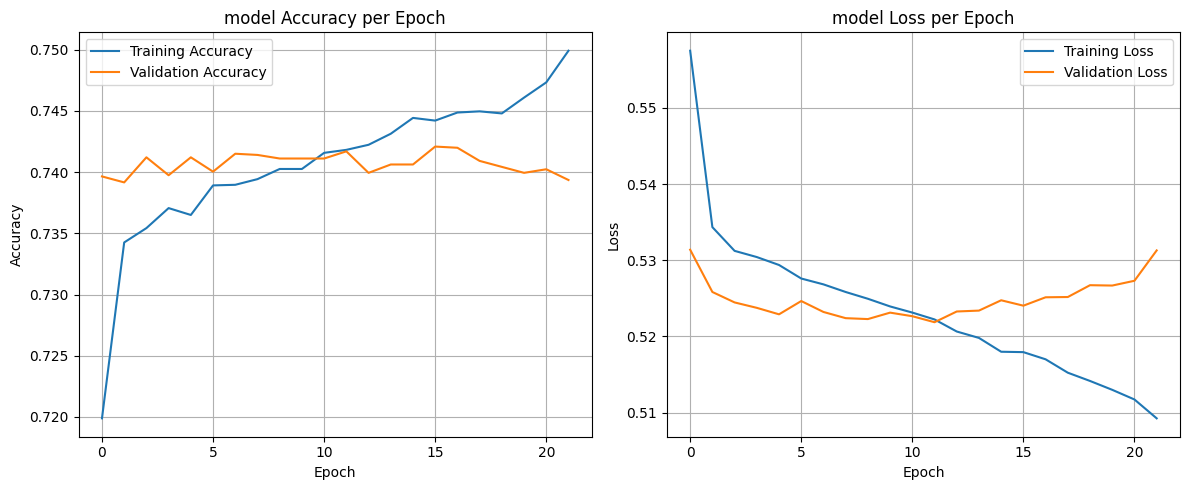


Plotting ROC Curve...


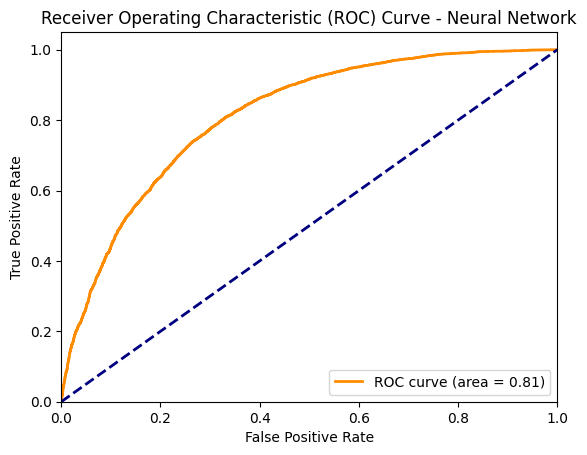


Plotting Precision-Recall Curve...


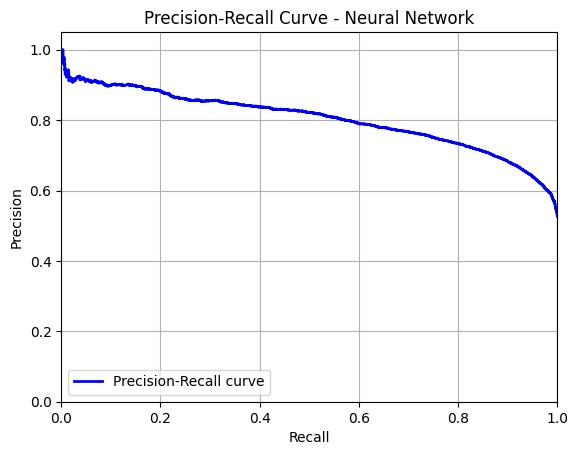


Plotting Confusion Matrix...


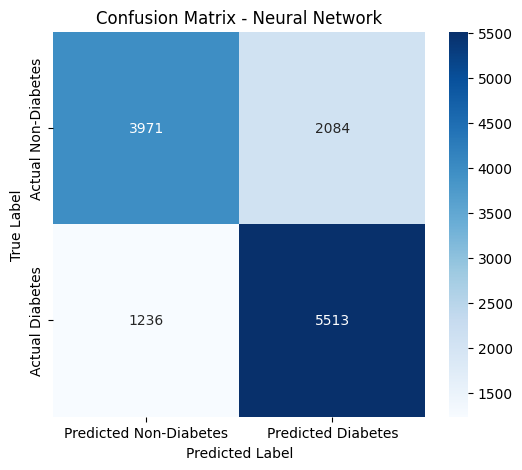


--- Summary Evaluation (Neural Network) ---
            model  Accuracy (Sklearn)  Precision    Recall  F1-Score   ROC_AUC
0  Neural Network            0.740706   0.725681  0.816862  0.768577  0.811473


In [ ]:
# Evaluasi Standar Keras
print("--- Evaluasi model Neural Network ---")
loss, accuracy, auc_score_eval = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy (dari Keras): {accuracy:.4f}")
print(f"Test AUC (dari Keras evaluate): {auc_score_eval:.4f}")

# Prediksi probabilitas
y_proba_nn = model.predict(X_test).ravel()

# Prediksi kelas
y_pred_nn = (y_proba_nn > 0.5).astype(int)

# Hitung metrik sklearn
accuracy_sk = accuracy_score(y_test, y_pred_nn)
precision_sk = precision_score(y_test, y_pred_nn, average='binary')
recall_sk = recall_score(y_test, y_pred_nn, average='binary')
f1_sk = f1_score(y_test, y_pred_nn, average='binary')
roc_auc_sk = roc_auc_score(y_test, y_proba_nn)

metrics_nn = {
    "model": "Neural Network",
    "Accuracy (Sklearn)": accuracy_sk,
    "Precision": precision_sk,
    "Recall": recall_sk,
    "F1-Score": f1_sk,
    "ROC_AUC": roc_auc_sk
}

print("\nClassification Report (dari Sklearn):")
print(classification_report(y_test, y_pred_nn, target_names=['Non-Diabetes', 'Diabetes']))


# Plot Training history
if 'history' in locals() and history is not None:
    print("\nPlotting Training history...")
    history_dict = history.history

    # Plot Accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history_dict['accuracy'], label='Training Accuracy')
    if 'val_accuracy' in history_dict:
        plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
    plt.title('model Accuracy per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history_dict['loss'], label='Training Loss')
    if 'val_loss' in history_dict:
        plt.plot(history_dict['val_loss'], label='Validation Loss')
    plt.title('model Loss per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()
else:
    print("\nTraining history tidak ditemukan. Plotting history dilewati.")


# ROC Curve
print("\nPlotting ROC Curve...")
fpr_nn, tpr_nn, thresholds_nn_roc = roc_curve(y_test, y_proba_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

plt.figure()
plt.plot(fpr_nn, tpr_nn, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_nn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Neural Network')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
print("\nPlotting Precision-Recall Curve...")
precision_nn, recall_nn, thresholds_nn_pr = precision_recall_curve(y_test, y_proba_nn)

plt.figure()
plt.plot(recall_nn, precision_nn, color='blue', lw=2, label=f'Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Neural Network')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


# Confusion Matrix (dengan seaborn)
print("\nPlotting Confusion Matrix...")
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Non-Diabetes', 'Predicted Diabetes'],
            yticklabels=['Actual Non-Diabetes', 'Actual Diabetes'])
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Summary Metrik Neural Network dalam bentuk DataFrame
summary_nn_df = pd.DataFrame([metrics_nn])
print("\n--- Summary Evaluation (Neural Network) ---")
print(summary_nn_df)

**INSIGHT**


---

Evaluasi ini menggunakan berbagai metrik dan visualisasi untuk mendapatkan pemahaman yang mendalam tentang performa model pada data uji.

**1. Performa Keseluruhan (Overall Performance)**
* **Akurasi & AUC**: Model mencapai **Akurasi sekitar 74.1%** dan **AUC sebesar 0.81**. Nilai AUC 0.81 menunjukkan bahwa model memiliki kemampuan yang baik (jauh lebih baik dari tebakan acak) dalam membedakan antara pasien diabetes dan non-diabetes.
* **Konsistensi Metrik**: Hasil evaluasi dari Keras (`model.evaluate`) dan Scikit-learn (`classification_report`) sangat konsisten, yang mengonfirmasi validitas hasil.

**2. Analisis Proses Training (Learning Curves)**
* **Stabilitas**: Grafik akurasi dan *loss* menunjukkan proses *training* yang stabil. *Training loss* terus menurun sementara *validation loss* cenderung mendatar, yang merupakan pertanda baik.
* **Tidak Ada Overfitting Parah**: Kurva *training* dan *validation* tidak berjauhan secara drastis, yang menandakan bahwa teknik regularisasi (*Dropout* dan *Batch Normalization*) serta `EarlyStopping` telah bekerja dengan efektif untuk mencegah *overfitting*.

**3. Analisis Kesalahan (Confusion Matrix)**
* **Kekuatan Model**: Model ini **sangat baik dalam mengidentifikasi pasien yang benar-benar menderita diabetes** (True Positive). Dari 6.749 pasien diabetes, model berhasil memprediksi **5.505** dengan benar (*Recall* tinggi sebesar 82%).
* **Kelemahan Model**: Kelemahannya terletak pada prediksi pasien non-diabetes. Model ini salah mengklasifikasikan **2.073** pasien non-diabetes sebagai penderita diabetes (False Positive). Ini tercermin pada nilai *Precision* (73%), yang berarti dari semua yang diprediksi diabetes, hanya 73% yang benar-benar diabetes.

**4. Kurva ROC dan Precision-Recall**
* **ROC Curve**: Area di bawah kurva yang besar (0.81) secara visual mengonfirmasi kemampuan diskriminatif model yang kuat.
* **Precision-Recall Curve**: Kurva ini menunjukkan *trade-off* yang ada. Untuk mendapatkan *recall* (kemampuan menemukan semua kasus positif) yang sangat tinggi, kita harus mengorbankan *precision* (akurasi dari prediksi positif), dan sebaliknya.

**Kesimpulan Akhir**
Model ini adalah **prediktor yang baik, terutama untuk menemukan kasus diabetes (recall tinggi)**. Namun, model ini memiliki kecenderungan untuk menghasilkan sejumlah besar *false positive*. Bergantung pada tujuan bisnis (apakah lebih penting menemukan semua penderita diabetes meskipun ada alarm palsu, atau menghindari alarm palsu meskipun ada beberapa kasus yang terlewat), *threshold* probabilitas (standarnya 0.5) dapat disesuaikan untuk mengoptimalkan antara *precision* dan *recall*.


## Saving Model

In [ ]:
# Simpan model
model.export("model_diabetes_saved")
print("Model saved successfully.")

Saved artifact at 'model_diabetes_saved'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 17), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  133803901505168: TensorSpec(shape=(1, 4), dtype=tf.float32, name=None)
  133803901508048: TensorSpec(shape=(1, 4), dtype=tf.float32, name=None)
  133803901505936: TensorSpec(shape=(1, 1), dtype=tf.float32, name=None)
  133803901507280: TensorSpec(shape=(1, 1), dtype=tf.float32, name=None)
  133803901506512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133804096109072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133803901502480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133803901507664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133803901505744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133803901502288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13380409

In [ ]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.34.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [ ]:
# Konversi model ke TF-JS
!tensorflowjs_converter --input_format=tf_saved_model model_diabetes_saved/ model_diabetes_tfjs/

2025-06-09 04:10:01.263040: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749442201.303099    3084 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749442201.314540    3084 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
2025-06-09 04:10:18.566973: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1749442218.567181    3084 gpu_device.cc:2022] Created device /job:localhost/replica:0/task

In [ ]:
# Konversi model TF-JS ke ZIP file
shutil.make_archive('model_diabetes_tfjs', 'zip', 'model_diabetes_tfjs')

'/content/model_diabetes_tfjs.zip'

In [ ]:
model.save("model_diabetes_saved.keras")

**INSIGHT**


---

Proses ini menyimpan model terlatih ke dalam tiga format kunci untuk kegunaan yang berbeda:

* **TensorFlow SavedModel (`model_diabetes_saved`)**: Format universal untuk *deployment* di server produksi.
* **TensorFlow.js (`model_diabetes_tfjs`)**: Untuk aplikasi web interaktif yang berjalan langsung di *browser*.
* **File `.keras`**: Untuk penggunaan kembali yang cepat di dalam lingkungan Python/Keras.


## Inference

In [ ]:
# ==============================================================================
# Langkah 1: Definisikan Ulang Kelas Custom Layer
# ==============================================================================
# Kita tetap perlu memberitahu Python apa itu 'FeatureSelector' saat memuat model.
class FeatureSelector(tf.keras.layers.Layer):
    def __init__(self, indices, **kwargs):
        super(FeatureSelector, self).__init__(**kwargs)
        self.indices = indices

    def call(self, inputs):
        return tf.gather(inputs, self.indices, axis=1)

    def get_config(self):
        config = super(FeatureSelector, self).get_config()
        config.update({"indices": self.indices})
        return config

# ==============================================================================
# Langkah 2: Muat Model dengan `custom_objects`
# ==============================================================================
# Kita menggunakan argumen 'custom_objects' untuk memberitahu Keras
# cara menangani layer 'FeatureSelector' yang kita buat.
try:
    loaded_model = tf.keras.models.load_model(
        'model_diabetes_saved.keras',
        custom_objects={'FeatureSelector': FeatureSelector}
    )
    print("Model mandiri berhasil dimuat.")
    loaded_model.summary()
except Exception as e:
    print(f"Gagal memuat model: {e}")

# ==============================================================================
# Langkah 3: Siapkan Sampel Data dan Jalankan Prediksi
# ==============================================================================
column_order = [
  'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke','HeartDiseaseorAttack',
  'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth',
  'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'BMI_clapped'
]

# Buat sampel data
new_sample_dict = {
    'HighBP': 1.0, 'HighChol': 1.0, 'CholCheck': 0.0, 'Smoker': 0.0, 'Stroke': 0.0,
    'HeartDiseaseorAttack': 0.0, 'PhysActivity': 1.0, 'Fruits': 1.0, 'Veggies': 1.0,
    'HvyAlcoholConsump': 0.0, 'GenHlth': 3.0,'MentHlth': 5.0, 'PhysHlth': 3.0,
    'DiffWalk': 0.0, 'Sex': 1.0, 'Age': 12.0,  'BMI_clapped': 35.0,
}
new_sample_list = [new_sample_dict[col] for col in column_order]
input_data = np.array([new_sample_list], dtype=np.float32)

print("\nData Input untuk Prediksi (shape):", input_data.shape)

# Jalankan Prediksi
if 'loaded_model' in locals():
    prediction = loaded_model.predict(input_data)
    probability_diabetes = prediction[0][0]
    threshold = 0.5
    predicted_class = "Diabetes" if probability_diabetes >= threshold else "Non-Diabetes"

    print("\n--- Hasil Prediksi ---")
    print(f"Probabilitas Diabetes: {probability_diabetes:.4f} ({(probability_diabetes*100):.2f}%)")
    print(f"Kelas Prediksi (dengan threshold {threshold}): {predicted_class}")

Model mandiri berhasil dimuat.


Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 17)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ select_minmax       │ (None, 4)         │          0 │ input_layer[0][0] │
│ (FeatureSelector)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ select_standard     │ (None, 1)         │          0 │ input_layer[0][0] │
│ (FeatureSelector)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_42    │ (None, 4)         │          9 │ select_minmax[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_43    │ (None, 1)         │          3 │ select_standard[… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ select_binary       │ (None, 12)        │          0 │ input_layer[0][0] │
│ (FeatureSelector)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ combined_features   │ (None, 17)        │          0 │ normalization_42… │
│ (Concatenate)       │                   │            │ normalization_43… │
│                     │                   │            │ select_binary[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │      4,608 │ combined_feature… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 256)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │     32,896 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_2[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 64)        │      8,256 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_3[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         65 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 141,072 (551.07 KB)

 Trainable params: 46,721 (182.50 KB)

 Non-trainable params: 908 (3.55 KB)

 Optimizer params: 93,443 (365.02 KB)


Data Input untuk Prediksi (shape): (1, 17)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 960ms/step

--- Hasil Prediksi ---
Probabilitas Diabetes: 0.7063 (70.63%)
Kelas Prediksi (dengan threshold 0.5): Diabetes


**INSIGHT**


---

Proses ini mendemonstrasikan alur kerja lengkap untuk menggunakan model yang telah disimpan guna membuat prediksi pada data baru. Prosesnya terdiri dari tiga langkah kunci:

1.  **Memuat Model dengan Komponen Kustom**:
    * Langkah pertama adalah memuat file model `.keras`. Karena model ini menggunakan *custom layer* (`FeatureSelector`) yang kita buat sendiri, kita harus **memberikan definisi kelasnya** saat memuat melalui argumen `custom_objects`. Ini penting agar TensorFlow tahu cara membangun kembali arsitektur model kita dengan benar.

2.  **Menyiapkan Input Sesuai Format Training**:
    * Selanjutnya, kita membuat sampel data baru. Sangat penting untuk memastikan **struktur data input sama persis** dengan data saat *training* (jumlah dan urutan fitur harus cocok). Model mengharapkan input dalam format array NumPy yang siap diproses.

3.  **Menjalankan Prediksi dan Interpretasi Hasil**:
    * Fungsi `model.predict()` digunakan pada data input untuk menghasilkan **nilai probabilitas** (dalam kasus ini, 70.63%).
    * Nilai probabilitas ini kemudian diubah menjadi **label kelas yang dapat dimengerti** ("Non-Diabetes") dengan membandingkannya pada sebuah *threshold* (ambang batas, standarnya 0.5).

Secara keseluruhan, alur ini menunjukkan bagaimana sebuah model yang "pintar" (karena sudah dilatih) tetap memerlukan input yang terstruktur dengan benar untuk dapat memberikan hasil prediksi yang akurat dan dapat diinterpretasikan.